# Cryptocurrency Historical Prices - Data Analytics Notebook

<h4><b>Dataset name / short description:</b></h4>
Name is "Cryptocurrency Historical Prices". The dataset has one csv file for each currency. Price history is available on a daily basis from April 28, 2013. This dataset has the historical price information of some of the top crypto currencies by market capitalization.

<h4><b>Columns:</b></h4>

- Date: date of observation

- Open: Opening price on the given day

- High: Highest price on the given day

- Low: Lowest price on the given day

- Close: Closing price on the given day

- Volume: Volume of transactions on the given day

- Market Cap: Market capitalization in USD


<h4><b>Data source (url):</b></h4>
https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?resource=download

<h4><b>Data format:</b></h4>
csv file

<h4><b>Aim to answer the following questions:</b></h4>

1. How did the historical prices / market capitalizations of various currencies change over time?

2. Predicting the future price of the currencies

3. Which currencies are more volatile and which ones are more stable?

4. How does the price fluctuations of currencies correlate with each other?

5. Seasonal trend in the price fluctuations

In [24]:
# import modules
# numpy and pandas for downloading and analyzing
# seaborn and matplotlib for plots and chars
# dtale for open df in the browser for analyzing
# os and glob for combining csv-files into one
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dtale
import os
import glob

In [25]:
# I tried many codes without repetition code lines
# to combine 22 csv-files into one
# all of them had errors except this one
# but every time when run the notebook, 
# the code continues to combine csv-files
# it creates duplicates
# I have to drop duplicates

# use glod to match the pattern (‘csv’) 
# and save the list of file names in the ‘all_filenames’ variabl
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])

#export to csv and create a dataframe from csv-file
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')
df = pd.read_csv('combined_csv.csv')

# drop duplicates
df = df.drop_duplicates()

# show the dataframe
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,NEM,XEM,2015-04-02 23:59:59,0.000323,0.000227,0.000242,0.000314,2.854940e+04,2.823534e+06
1,2,NEM,XEM,2015-04-03 23:59:59,0.000330,0.000291,0.000309,0.000310,2.067790e+04,2.792457e+06
2,3,NEM,XEM,2015-04-04 23:59:59,0.000318,0.000251,0.000310,0.000277,2.355020e+04,2.488770e+06
3,4,NEM,XEM,2015-04-05 23:59:59,0.000283,0.000218,0.000272,0.000232,2.680020e+04,2.087388e+06
4,5,NEM,XEM,2015-04-06 23:59:59,0.000299,0.000229,0.000232,0.000289,2.251150e+04,2.598354e+06
...,...,...,...,...,...,...,...,...,...,...
472129,726,Ethereum,ETH,2017-08-02 23:59:59,229.511993,218.117996,227.005997,219.951996,6.326060e+08,2.061875e+10
472132,729,Ethereum,ETH,2017-08-05 23:59:59,256.506989,221.951996,222.852005,256.506989,1.333000e+09,2.406177e+10
472173,770,Ethereum,ETH,2017-09-15 23:59:59,258.654999,195.035004,215.220993,250.464005,1.935700e+09,2.370457e+10
481006,2589,Dogecoin,DOGE,2021-01-16 23:59:59,0.009531,0.009140,0.009367,0.009265,2.586305e+08,1.185597e+09


In [26]:
# cleaning data
# we can see do have any missing values
df.isna().sum()

# we do not have NaN values

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [27]:
# we can see that Date column
# has a default time, we can delete it
# date to year-month-day (int)
df['Date'] = df['Date'].str.slice(0, 10)

In [28]:
# actually, we can split Date column to smaller pieces
# probably, we could see correlations
# between days, months and years
# we make rows in colums as int
df["Year"] = df['Date'].str.slice(0, 4).astype(int)
df["Month"] = df['Date'].str.slice(5, 7).astype(int)
df["Day"] = df['Date'].str.slice(8, 10).astype(int)
df = df.drop('Date', axis=1)
df

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap,Year,Month,Day
0,1,NEM,XEM,0.000323,0.000227,0.000242,0.000314,2.854940e+04,2.823534e+06,2015,4,2
1,2,NEM,XEM,0.000330,0.000291,0.000309,0.000310,2.067790e+04,2.792457e+06,2015,4,3
2,3,NEM,XEM,0.000318,0.000251,0.000310,0.000277,2.355020e+04,2.488770e+06,2015,4,4
3,4,NEM,XEM,0.000283,0.000218,0.000272,0.000232,2.680020e+04,2.087388e+06,2015,4,5
4,5,NEM,XEM,0.000299,0.000229,0.000232,0.000289,2.251150e+04,2.598354e+06,2015,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
472129,726,Ethereum,ETH,229.511993,218.117996,227.005997,219.951996,6.326060e+08,2.061875e+10,2017,8,2
472132,729,Ethereum,ETH,256.506989,221.951996,222.852005,256.506989,1.333000e+09,2.406177e+10,2017,8,5
472173,770,Ethereum,ETH,258.654999,195.035004,215.220993,250.464005,1.935700e+09,2.370457e+10,2017,9,15
481006,2589,Dogecoin,DOGE,0.009531,0.009140,0.009367,0.009265,2.586305e+08,1.185597e+09,2021,1,16


<AxesSubplot: xlabel='Volume', ylabel='Name'>

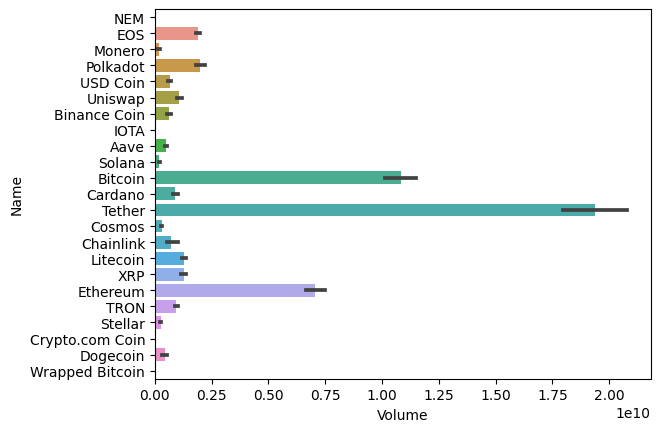

In [37]:
# How did the historical prices / market capitalizations of various currencies change over time?
# Predicting the future price of the currencies
# Which currencies are more volatile and which ones are more stable?
# How does the price fluctuations of currencies correlate with each other?
# Seasonal trend in the price fluctuations

# we could see that Bitcoin, Tether and Etherum
# have the biggest volume on the market during 8 years
# Is High Trading Volume Good In Crypto? Not always. 
# High volume does often indicate more market interest in a coin 
# and its potential appreciation in value, but it can also mark the beginning 
# (or a peak) of a bear market as more people sell off in anticipation of prices going down
sns.barplot(x='Volume', y='Name', data=df)

<AxesSubplot: xlabel='Volume', ylabel='Name'>

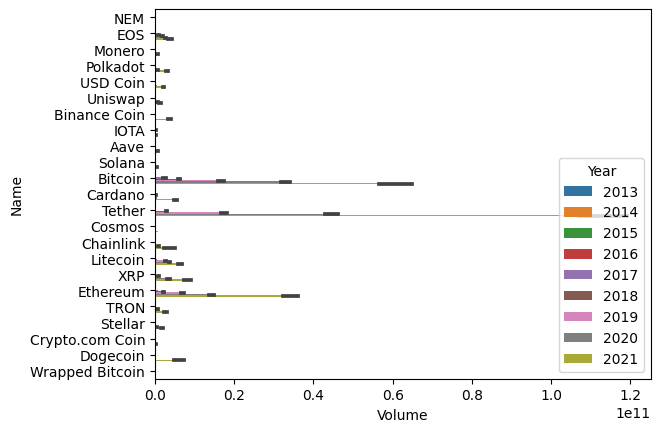

In [38]:
# we could see 
sns.barplot(x='Volume', y='Name', data=df, hue='Year')